In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [2]:
data = pd.read_csv("/Users/anishagautam/Personal/ML Algorithm/diabetes.csv")

In [3]:
print("Data types of the dataset columns:\n",data.dtypes)
print("Total null values of the dataset:\n",data.isnull().sum())
print("Summary statistics of dataset:\n",data.describe())

Data types of the dataset columns:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Total null values of the dataset:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary statistics of dataset:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807   

2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [10]:
x = data.drop(columns=['Outcome']).values
y = data['Outcome'].values



In [11]:
def train_test_split(x,y,test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size = int (len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  x_train = x[train_indices]
  x_test = x[test_indices]
  y_train = y[train_indices]
  y_test = y[test_indices]

  return x_train,y_train,x_test,y_test
  
x_train,y_train,x_test, y_test = train_test_split(x, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train: ", x_train.shape)  
print("Shape of X_test", x_test.shape)      
print("Shape of Y_train", y_train.shape)   
print("Shape of Y_test", y_test.shape)  

Shape of X_train:  (538, 8)
Shape of X_test (230, 8)
Shape of Y_train (538,)
Shape of Y_test (230,)


4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [12]:
def euclidean_distance(point1,point2):
  if (point1.shape != point2.shape) :
    raise ValueError("Points must have same dimension to calculate distance.")
  distance = np.sqrt(np.sum(point1 - point2)**2)
  return distance

In [13]:
def knn_predict_single(query,x_train,y_train,k=3):
  distance = [euclidean_distance(query,x) for x in x_train]
  sorted_indices = np.argsort(distance)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [14]:
def knn_predict(x_test,x_train,y_train,k=3):
  predictions = [knn_predict_single(x,x_train,y_train,k) for x in x_test]
  return np.array(predictions)


In [15]:
def compute_accuracy(y_true,y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

try:
  predictions = knn_predict(x_test,x_train,y_train,k=3)
  accuracy = compute_accuracy(y_test,predictions)
  print ("Accuracy of KNN model on the test data is: ",accuracy)
except Exception as e:
  print("An unexpected error occurred.",e)

Accuracy of KNN model on the test data is:  61.73913043478261


Problem - 2 - Experimentation:

1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [19]:
# standard scaling 
X_standard = (x - x.mean()) / x.std()


In [31]:
x_train_scale,y_train_scale,x_test_scale, y_test_scale = train_test_split(X_standard, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train: ", x_train_scale.shape)  
print("Shape of X_test", x_test_scale.shape)      
print("Shape of Y_train", y_train_scale.shape)   
print("Shape of Y_test", y_test_scale.shape) 

Shape of X_train:  (538, 8)
Shape of X_test (230, 8)
Shape of Y_train (538,)
Shape of Y_test (230,)


In [36]:
def knn_predict_single_scale(query,x_train_scale,y_train_scale,k=3):
  distance = [euclidean_distance(query,i) for i in x_train_scale]
  sorted_indices = np.argsort(distance)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train_scale[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [37]:
def knn_predict_scale(x_test_scale,x_train_scale,y_train_scale,k=3):
  predictions = [knn_predict_single_scale(i,x_train_scale,y_train_scale,k) for i in x_test_scale]
  return np.array(predictions)


In [38]:
try:
  predictions = knn_predict_scale(x_test_scale,x_train_scale,y_train_scale,k=3)
  accuracy = compute_accuracy(y_test_scale,predictions)
  print ("Accuracy of KNN model on the test data is: ",accuracy)
except Exception as e:
  print("An unexpected error occurred.",e)

Accuracy of KNN model on the test data is:  61.73913043478261


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.

In [40]:
accuracies = {}
times = {}
def experiment_knn_k_values(X_train,Y_train,X_test,Y_test,k_values):
  for k in k_values:
    # Record start time before making predictions
    start_time = time.time()
    #make predictions using the current value of k
    predictions = knn_predict(X_test,X_train,Y_train,k=k)
    # Record end time after making predictions
    end_time = time.time()
    # compute the accuracy
    accuracy = compute_accuracy(Y_test,predictions)
    accuracies[k] = accuracy
    times[k] = end_time - start_time
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    print(f"Time taken for k={k}: {times[k]:.4f} seconds")
  return accuracies, times

2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.

Accuracy for k=1: 60.00%
Time taken for k=1: 0.3037 seconds
Accuracy for k=2: 63.91%
Time taken for k=2: 0.2780 seconds
Accuracy for k=3: 61.74%
Time taken for k=3: 0.2790 seconds
Accuracy for k=4: 66.96%
Time taken for k=4: 0.3182 seconds
Accuracy for k=5: 64.35%
Time taken for k=5: 0.2716 seconds
Accuracy for k=6: 64.35%
Time taken for k=6: 0.2738 seconds
Accuracy for k=7: 65.65%
Time taken for k=7: 0.2809 seconds
Accuracy for k=8: 66.52%
Time taken for k=8: 0.2765 seconds
Accuracy for k=9: 67.39%
Time taken for k=9: 0.2764 seconds
Accuracy for k=10: 67.83%
Time taken for k=10: 0.2815 seconds
Accuracy for k=11: 66.96%
Time taken for k=11: 0.2728 seconds
Accuracy for k=12: 66.52%
Time taken for k=12: 0.2713 seconds
Accuracy for k=13: 68.26%
Time taken for k=13: 0.2706 seconds
Accuracy for k=14: 66.09%
Time taken for k=14: 0.2711 seconds


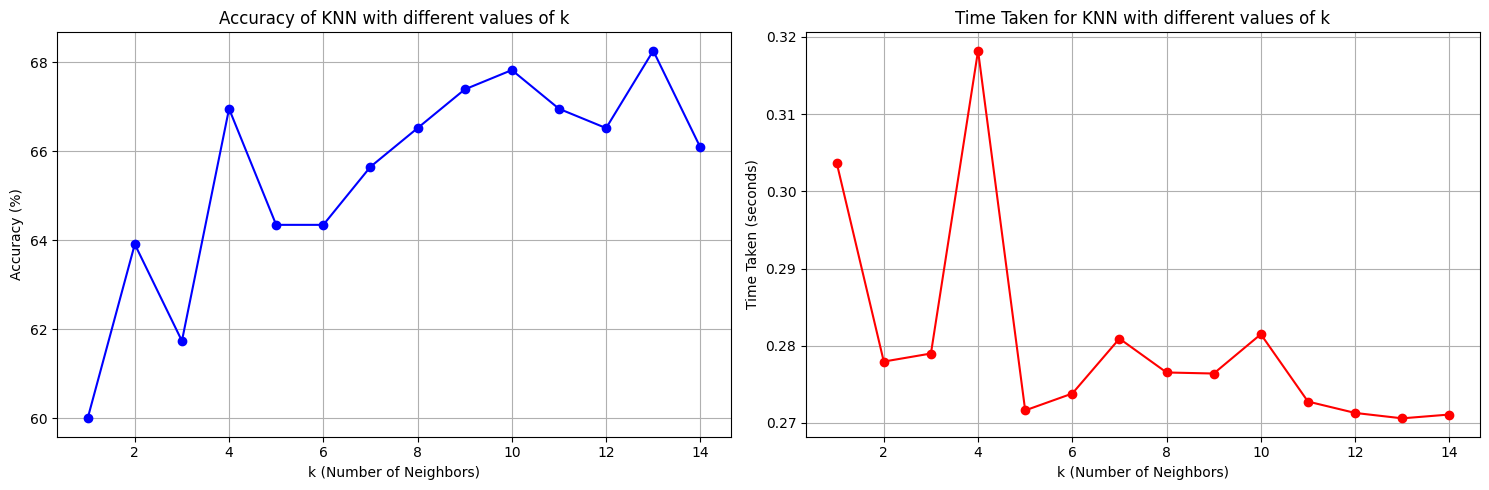

Experiment completed. Check the plots for accuracy and time trends.


In [43]:
# Define the range of k values to experiment with
k_values = range(1, 15)

try:
    accuracies, times = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    
    plt.figure(figsize=(15, 5))
    # Plot Accuracy vs k
    plt.subplot(1, 2, 1) 
    plt.plot(k_values, list(accuracies.values()), marker='o', color='b')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy of KNN with different values of k")
    plt.grid()

    # Plot Time Taken vs k
    plt.subplot(1, 2, 2)  
    plt.plot(k_values, list(times.values()), marker='o', color='r')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Time Taken for KNN with different values of k")
    plt.grid()

    # Display the plots
    plt.tight_layout()
    plt.show()
    
    print("Experiment completed. Check the plots for accuracy and time trends.")

except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


Accuracy for k=1: 60.00%
Time taken for k=1: 0.3198 seconds
Accuracy for k=2: 63.91%
Time taken for k=2: 0.2748 seconds
Accuracy for k=3: 61.74%
Time taken for k=3: 0.2796 seconds
Accuracy for k=4: 66.96%
Time taken for k=4: 0.2847 seconds
Accuracy for k=5: 64.35%
Time taken for k=5: 0.2831 seconds
Accuracy for k=6: 64.35%
Time taken for k=6: 0.2767 seconds
Accuracy for k=7: 65.65%
Time taken for k=7: 0.2713 seconds
Accuracy for k=8: 66.52%
Time taken for k=8: 0.2730 seconds
Accuracy for k=9: 67.39%
Time taken for k=9: 0.2699 seconds
Accuracy for k=10: 67.83%
Time taken for k=10: 0.2716 seconds
Accuracy for k=11: 66.96%
Time taken for k=11: 0.2724 seconds
Accuracy for k=12: 66.52%
Time taken for k=12: 0.2724 seconds
Accuracy for k=13: 68.26%
Time taken for k=13: 0.2828 seconds
Accuracy for k=14: 66.09%
Time taken for k=14: 0.2770 seconds


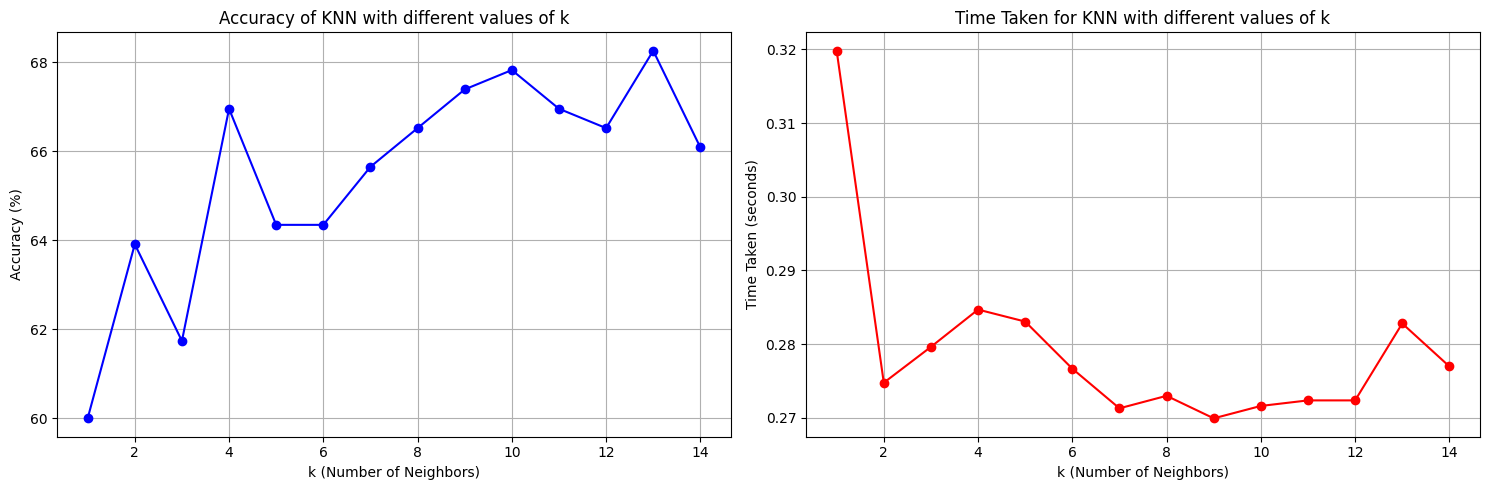

Experiment completed. Check the plots for accuracy and time trends.


In [44]:
# Define the range of k values to experiment with
k_values = range(1, 15)

try:
    accuracies, times = experiment_knn_k_values(x_train_scale, y_train_scale, x_test_scale, y_test_scale, k_values)
    
    plt.figure(figsize=(15, 5))
    # Plot Accuracy vs k
    plt.subplot(1, 2, 1) 
    plt.plot(k_values, list(accuracies.values()), marker='o', color='b')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy of KNN with different values of k")
    plt.grid()

    # Plot Time Taken vs k
    plt.subplot(1, 2, 2)  
    plt.plot(k_values, list(times.values()), marker='o', color='r')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Time Taken for KNN with different values of k")
    plt.grid()

    # Display the plots
    plt.tight_layout()
    plt.show()
    
    print("Experiment completed. Check the plots for accuracy and time trends.")

except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")
